In [2]:
import seaborn as sns
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import matplotlib.pyplot as plt 

In [7]:
df = pd.read_csv('funda.csv', sep=';')

In [8]:
df_subset = df[df['price'] > 100000]
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10993 entries, 0 to 11442
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             10993 non-null  int64 
 1   address        10993 non-null  object
 2   area           10993 non-null  int64 
 3   bedrooms       10993 non-null  int64 
 4   postal_code    10993 non-null  object
 5   posting_date   10993 non-null  object
 6   price          10993 non-null  int64 
 7   property_type  10993 non-null  object
 8   rooms          10993 non-null  int64 
 9   sale_date      10993 non-null  object
 10  url            10993 non-null  object
 11  year_built     10993 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.1+ MB
None


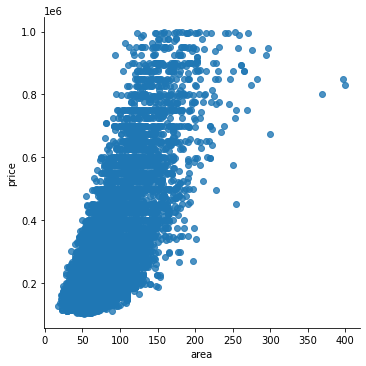

In [25]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df_subset) #fit_reg=False leaves out the regression line; see below


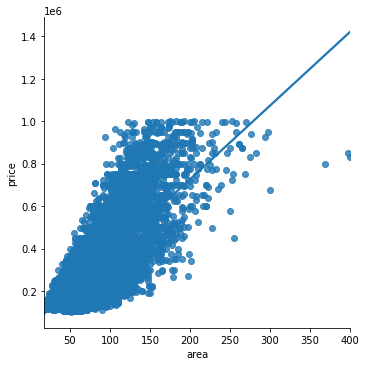

In [26]:
sns.lmplot(x='area', y='price', fit_reg=True, data=df_subset, ci=False) #fit_reg=False leaves out the regression line; see below


In [44]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[['area']] 
y = df['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals. 

The regression line is equal to y = 79.24 + 0.10X


In [43]:
df['test'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)

,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,test
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,04-06-2016,105.192247,apartment,3,23-06-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,89.785011
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-06-2016,79.913764,apartment,2,05-07-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,83.828439
2,2,Zeeburgerdijk 349,116,2,1095 AD,09-06-2016,89.339639,apartment,3,08-07-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,90.566200
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-05-2016,88.482741,apartment,3,02-06-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,84.902575
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-06-2016,78.628417,apartment,3,23-06-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,85.390818
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-05-2016,105.620696,apartment,3,09-06-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,91.445039
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-06-2016,78.628417,apartment,4,23-06-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,85.488467
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-05-2016,112.818636,apartment,5,09-06-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,94.374501
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-05-2016,82.827216,apartment,3,10-06-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,87.539090
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-05-2016,87.197394,apartment,3,27-05-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,85.781413
